<a href="https://colab.research.google.com/github/charlesrugg/nfldata/blob/main/NFL_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nfl-data-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nfl_data_py as nfl
df = nfl.import_ngs_data('passing',[2022])

In [ ]:
df.head

<bound method NDFrame.head of       season season_type  week player_display_name player_position team_abbr  \
3491    2022         REG     0         Sam Darnold              QB       CAR   
3492    2022         REG     0           Matt Ryan              QB       IND   
3493    2022         REG     0       Lamar Jackson              QB       BAL   
3494    2022         REG     0         Cooper Rush              QB       DAL   
3495    2022         REG     0      Ryan Tannehill              QB       TEN   
...      ...         ...   ...                 ...             ...       ...   
4089    2022        POST    21          Joe Burrow              QB       CIN   
4090    2022        POST    21         Jalen Hurts              QB       PHI   
4091    2022        POST    21     Patrick Mahomes              QB        KC   
4092    2022        POST    23     Patrick Mahomes              QB        KC   
4093    2022        POST    23         Jalen Hurts              QB       PHI   

      avg

In [ ]:
# Select only the numeric columns from the original dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Group by player_display_name and calculate the mean of each column
grouped = df.groupby('player_display_name')[numeric_cols].mean()

# Move the player_display_name index to column
grouped.reset_index(inplace=True)

In [ ]:
grouped.head

<bound method NDFrame.head of    player_display_name  season       week  avg_time_to_throw  \
0        Aaron Rodgers  2022.0   8.722222           2.701436   
1          Andy Dalton  2022.0  10.066667           2.627019   
2        Anthony Brown  2022.0  18.000000           2.686214   
3         Bailey Zappe  2022.0   5.500000           2.884749   
4       Baker Mayfield  2022.0   8.846154           2.841525   
..                 ...     ...        ...                ...   
62      Trevor Siemian  2022.0  12.000000           2.655680   
63          Trey Lance  2022.0   1.000000           2.942143   
64      Tua Tagovailoa  2022.0   8.461538           2.604778   
65       Tyler Huntley  2022.0  16.000000           2.865632   
66         Zach Wilson  2022.0   8.100000           3.087924   

    avg_completed_air_yards  avg_intended_air_yards  \
0                  5.128770                8.027893   
1                  5.964916                7.756637   
2                  7.628421         

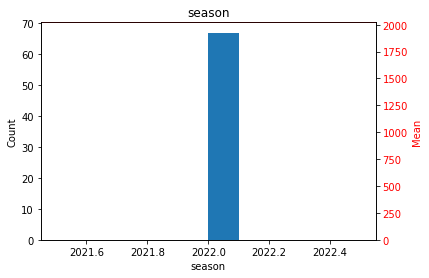

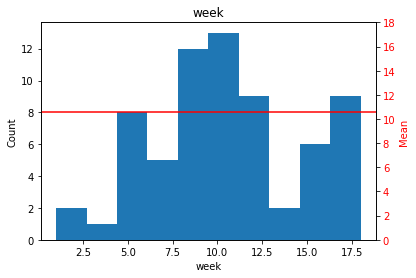

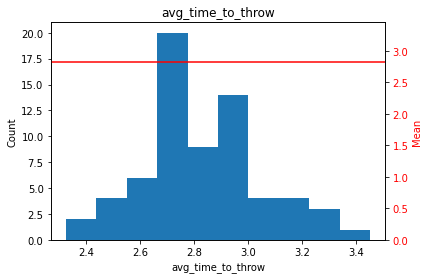

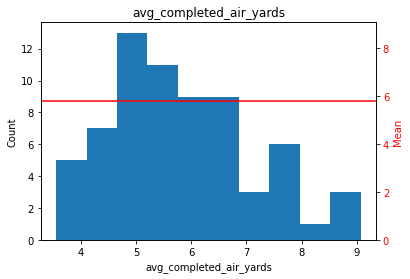

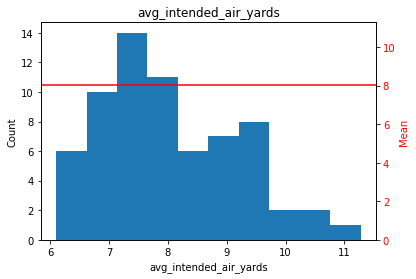

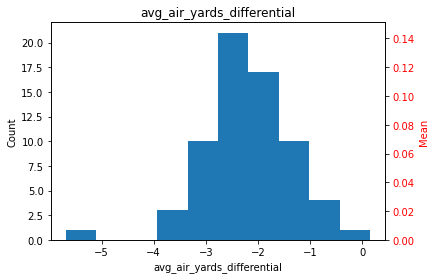

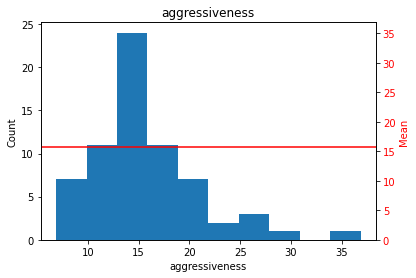

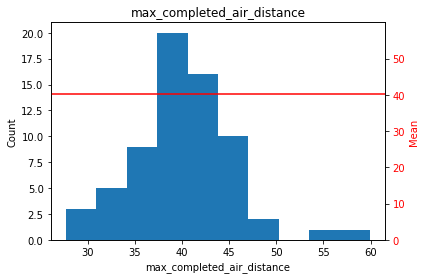

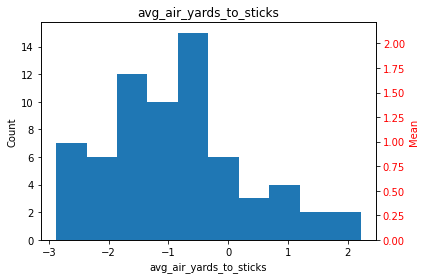

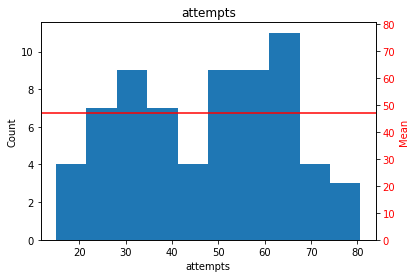

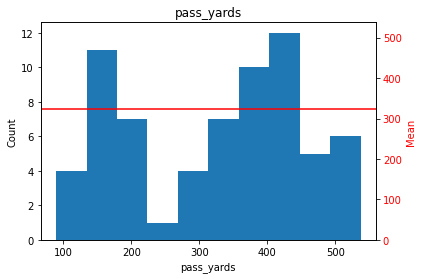

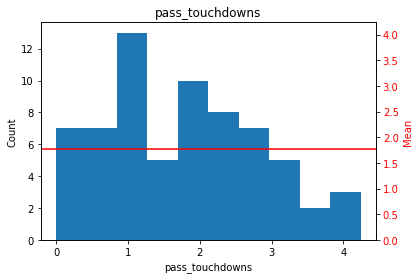

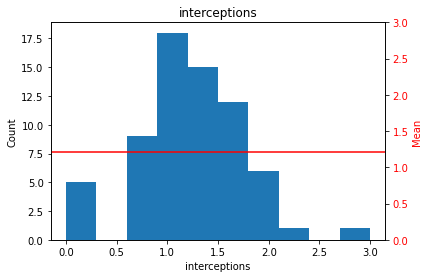

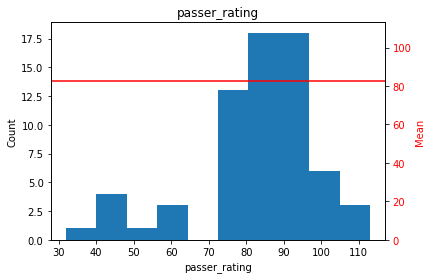

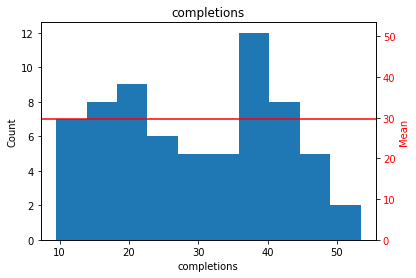

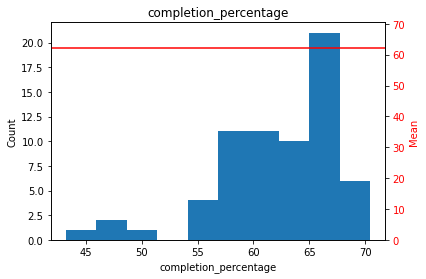

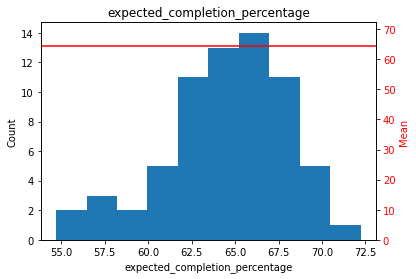

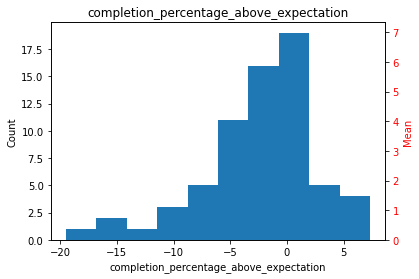

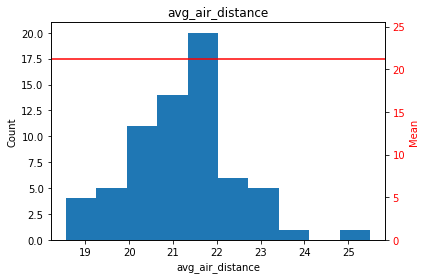

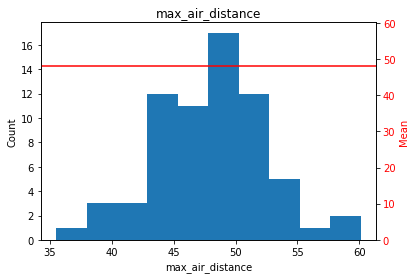

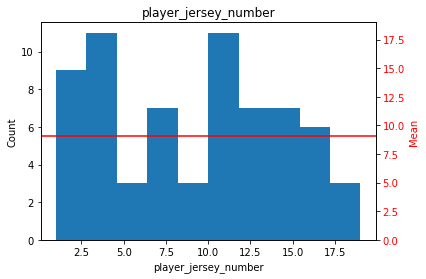

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Create a histogram for each column
for col in grouped.columns:
    # Check if the column is not the player_display_name column
    if col != 'player_display_name':
        # Calculate the mean of the column
        avg = grouped[col].mean()

        # Create the histogram
        fig, ax1 = plt.subplots()
        ax1.hist(grouped[col])
        ax1.set_xlabel(col)
        ax1.set_ylabel("Count")

        # Add a second y-axis for the mean
        ax2 = ax1.twinx()
        ax2.axhline(y=avg, color='r', linestyle='-')
        ax2.set_ylabel("Mean", color='r')
        ax2.tick_params(axis='y', labelcolor='r')
        ax2.set_ylim([0, grouped[col].max()])

        # Display the plot
        plt.title(col)
        plt.show()